#### Importing all needed libraries and dataset

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hotels = pd.read_csv('hotel_reviews_cleaned.csv')
hotels.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Longitude,Latitude
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,4.915968,52.360576
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,4.915968,52.360576
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,4.915968,52.360576


In [243]:
hotels.shape

(515738, 17)

#### Basic cleaning of the dataset (drop_na and duplicates)

In [244]:
#dropping duplicates from the dataset
hotels.drop_duplicates(inplace=True)

In [245]:
#deleting raws with empty cells from the dataset
hotels = hotels.dropna(axis=1)

In [246]:
# shape of the dataset
hotels.shape

(515212, 17)

In [247]:
# getting names of the columns in dataset
columns = hotels.columns
print(columns)

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'Longitude', 'Latitude'],
      dtype='object')


In [248]:
#cheking types of data in columns in dataset
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 10  R

#### Checking whole dataset for outfitters and cleaning it

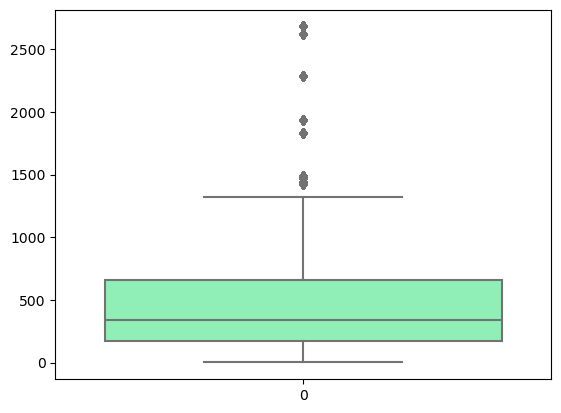

In [249]:
# outfitters visualisation in Additional_Number_of_Scoring column
sns.boxplot(data=hotels["Additional_Number_of_Scoring"], palette='rainbow', orient='v');

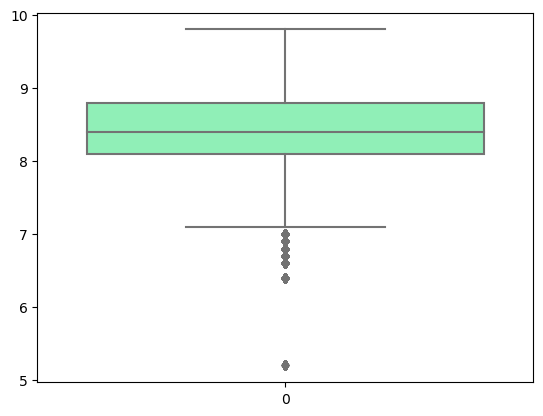

In [250]:
# outfitters visualisation in Average_Score column
sns.boxplot(data=hotels["Average_Score"], palette='rainbow', orient='v');

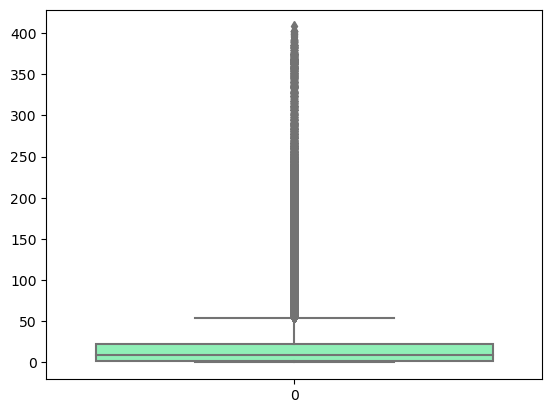

In [251]:
# outfitters visualisation in Review_Total_Negative_Word_Counts column
sns.boxplot(data=hotels["Review_Total_Negative_Word_Counts"], palette='rainbow', orient='v');

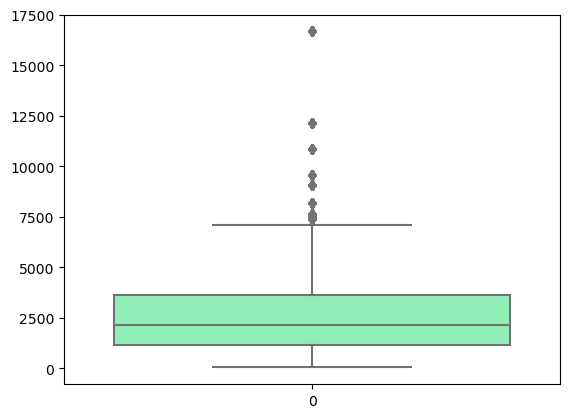

In [252]:
# outfitters visualisation in Total_Number_of_Reviews column
sns.boxplot(data=hotels["Total_Number_of_Reviews"], palette='rainbow', orient='v');

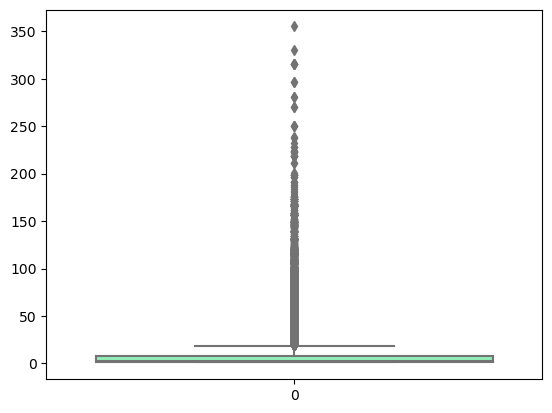

In [253]:
# outfitters visualisation in Total_Number_of_Reviews_Reviewer_Has_Given column
sns.boxplot(data=hotels["Total_Number_of_Reviews_Reviewer_Has_Given"], palette='rainbow', orient='v');

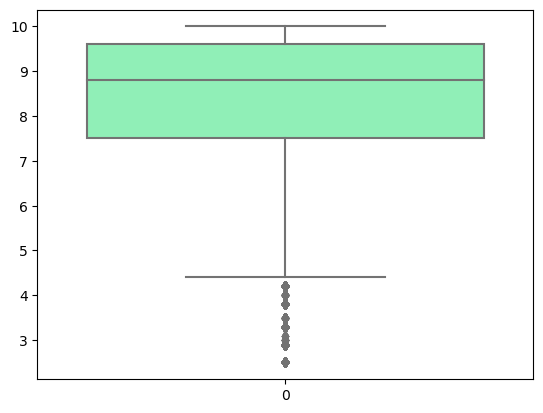

In [254]:
# outfitters visualisation in Review Score column
sns.boxplot(data=hotels["Reviewer_Score"], palette='rainbow', orient='v');

#### Cleaning dataset from outfitters

In [255]:
import numpy as np

# cleaning outfitters with deviation method in each numerical column of dataset

hotels_without_outfitters= hotels
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Additional_Number_of_Scoring']-hotels_without_outfitters['Additional_Number_of_Scoring'].mean()) <= (3*hotels_without_outfitters['Additional_Number_of_Scoring'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Average_Score']-hotels_without_outfitters['Average_Score'].mean()) <= (3*hotels_without_outfitters['Average_Score'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Review_Total_Negative_Word_Counts']-hotels_without_outfitters['Review_Total_Negative_Word_Counts'].mean()) <= (3*hotels_without_outfitters['Review_Total_Negative_Word_Counts'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Total_Number_of_Reviews']-hotels_without_outfitters['Total_Number_of_Reviews'].mean()) <= (3*hotels_without_outfitters['Total_Number_of_Reviews'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Review_Total_Positive_Word_Counts']-hotels_without_outfitters['Review_Total_Positive_Word_Counts'].mean()) <= (3*hotels_without_outfitters['Review_Total_Positive_Word_Counts'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Total_Number_of_Reviews_Reviewer_Has_Given']-hotels_without_outfitters['Total_Number_of_Reviews_Reviewer_Has_Given'].mean()) <= (3*hotels_without_outfitters['Total_Number_of_Reviews_Reviewer_Has_Given'].std())]
hotels_without_outfitters= hotels_without_outfitters[np.abs(hotels_without_outfitters['Reviewer_Score']-hotels_without_outfitters['Reviewer_Score'].mean()) <= (3*hotels_without_outfitters['Reviewer_Score'].std())]


hotels_without_outfitters.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
Longitude                                     0
Latitude                                      0
dtype: int64

#### After deleting outfitters size of the dataset become smaller more that to 10%. 

In [256]:
#checking the size of the dataset after cleaning outfitters
hotels_without_outfitters.shape

(463330, 17)

#### Checking for irrelevant data
           
Review_Date                                 checking relevant dates (date not in the future) - DONE                               
Negative_Review                             deleting "No Negative" to prevent it influence on the sentimental analysis results - DONE
Positive_Review                             deleting "No Positive" to prevent it influence on the sentimental analysis results - DONE 
Total_Number_of_Reviews_Reviewer_Has_Given                       
Longitude                                   Checking the relevance of the coordinates
Latitude                                    Checking the relevance of the coordinates 

In [257]:
### Checking relevance of the dates
hotels_without_outfitters['Review_Date'] = pd.to_datetime(hotels_without_outfitters['Review_Date'], errors='coerce')                                 

#non_existing_dates = hotels_without_outfitters[hotels_without_outfitters['Review_Date'] > pd.Timestamp.now()]

hotels_cleaned_date = hotels_without_outfitters.drop(hotels_without_outfitters[hotels_without_outfitters['Review_Date'] > pd.Timestamp.now()].index)

print(hotels_cleaned_date['Review_Date'].head)


<bound method NDFrame.head of 2        2017-07-31
5        2017-07-24
6        2017-07-17
7        2017-07-17
8        2017-07-09
            ...    
515732   2015-09-06
515733   2015-08-30
515734   2015-08-22
515736   2015-08-17
515737   2015-08-09
Name: Review_Date, Length: 463330, dtype: datetime64[ns]>


#### Replacing values in Positive and Negative Reviews (No Positive, No negative with Neutral)

In [258]:
# checking number of the raws with "No negative" instead of the whole review. 
# Those raws should be excluded cause they have biased effect on further sentimental analysis.     
biased_value_negative = len(hotels_cleaned_date[hotels_cleaned_date["Negative_Review"]=='No Negative'])
print (biased_value_negative)


119517


In [259]:
# replacing "No negative" value with "Neutral" 
hotels_cleaned_date["Negative_Review"]= hotels_cleaned_date["Negative_Review"].str.strip()
hotels_cleaned_date.loc[hotels_cleaned_date["Negative_Review"] == "No Negative", "Negative_Review"] = "Neutral"

checking_biased_values = len(hotels_cleaned_date[hotels_cleaned_date["Negative_Review"]=='No negative'])
print (checking_biased_values)

0


In [260]:
# checking number of the raws with "No positive" instead of the whole review. 
biased_value_positive = len(hotels_cleaned_date[hotels_cleaned_date["Positive_Review"]=='No Positive'])
print (biased_value_positive)
hotels_cleaned_date["Positive_Review"]= hotels_cleaned_date["Positive_Review"].str.strip()
hotels_cleaned_date.loc[hotels_cleaned_date["Positive_Review"] == "No Positive", "Positive_Review"] = "Neutral"

# replacing "No positive" value with "Neutral" 
checking_biased_values_pos = len(hotels_cleaned_date[hotels_cleaned_date["Positive_Review"]=='No Positive'])
print (checking_biased_values_pos)

#!!!!!!!!
# saving cleaned data in the separate .csv file
#hotels_cleaned_date.to_csv('hotels_cleaned.csv')
#!!!!!!!!

hotels_cleaned_reviews = hotels_cleaned_date


31020
0


#### Checking the quantity of unique hotels 

In [261]:
total_unique_hotels = hotels['Hotel_Name'].nunique()
print(f"Total number of unique hotels: {total_unique_hotels}")

Total number of unique hotels: 1492


#### Deriving country from hotel address into separate column

In [262]:
# extracting the country from the hotel address 
# if the last word is "Kingdom", take the two last words instead
hotels_cleaned_date['Country'] = hotels_cleaned_date['Hotel_Address'].apply(lambda x: " ".join(x.split()[-2:]) if x.split()[-1] == "Kingdom" else x.split()[-1])

# printing the unique countries
unique_countries = hotels_cleaned_date['Country'].unique()
print(unique_countries)

# counting the total number of unique countries
total_unique_countries = hotels_cleaned_date['Country'].nunique()
print(f"Total number of unique countries: {total_unique_countries}")

# saving cleaned data in the separate .csv file
hotels_cleaned_date.to_csv('hotels_cleaned_with_countries.csv')

['Netherlands' 'United Kingdom' 'France' 'Spain' 'Italy' 'Austria']
Total number of unique countries: 6


#### Exploring how many hotels are in each country

In [263]:
# taking needed columns in separate dataset. 
hotels_in_countries = hotels_cleaned_date.loc[:,["Hotel_Name", "Country"]]
hotels_in_countries.head(25)
grouped_by_hotel = hotels_in_countries.groupby("Hotel_Name").first()
grouped_by_hotel.head(10)

# counting number of hotels in each country 
hotels_in_country = grouped_by_hotel['Country'].value_counts()
hotels_in_country.head(10)


Country
France            458
United Kingdom    393
Spain             211
Austria           157
Italy             157
Netherlands       104
Name: count, dtype: int64

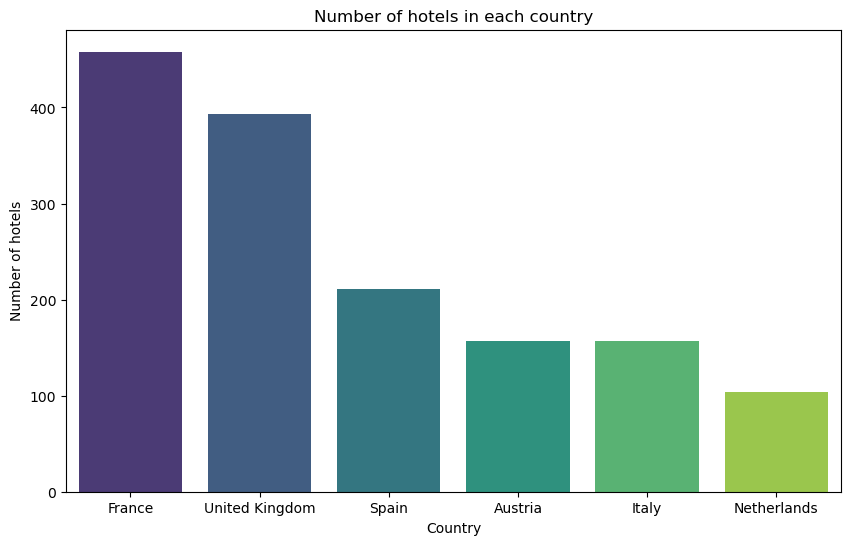

In [264]:
### Visualisation of how many hotels are in each country
plt.figure(figsize=(10, 6))
sns.barplot(x=hotels_in_country.index, y=hotels_in_country.values, palette='viridis')
plt.title('Number of hotels in each country')
plt.xlabel('Country')
plt.ylabel('Number of hotels')
plt.show()

### Count of Average Score

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

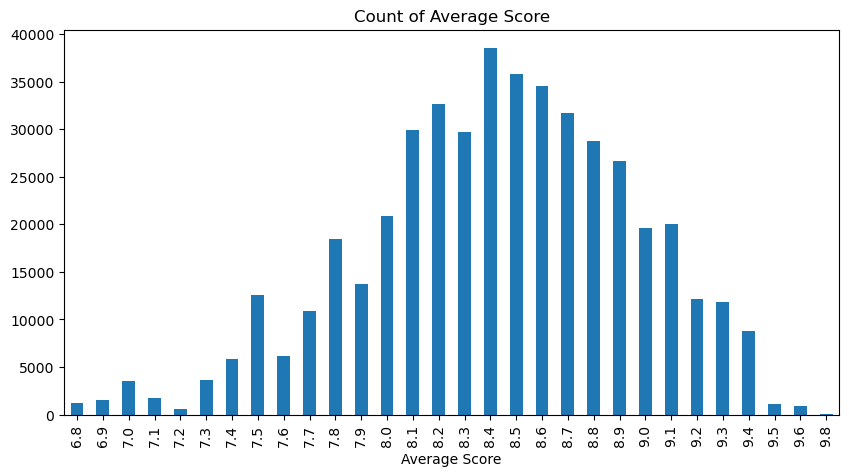

In [293]:
ax = hotels_cleaned_date["Average_Score"].value_counts().sort_index().plot(kind ="bar", title = "Count of Average Score", 
                                                                      figsize=(10, 5))
ax.set_xlabel("Average Score")
plt.show()

#### Checking number of reviews by date

In [266]:
hotels_cleaned_reviews = hotels_cleaned_date
start = hotels_cleaned_reviews["Review_Date"].min()
end = hotels_cleaned_reviews["Review_Date"].max()
print ("Start", start)
print ("End", end)


Start 2015-08-04 00:00:00
End 2017-08-03 00:00:00


In [267]:
hotels_cleaned_reviews["Review_Date"].value_counts()     

Review_Date
2017-08-02    2304
2016-09-15    2105
2017-04-05    2058
2016-02-16    1766
2016-08-30    1764
              ... 
2016-09-10     176
2017-04-04     169
2017-04-03     156
2017-04-01     144
2017-04-02     119
Name: count, Length: 731, dtype: int64

In [268]:
# Counting sum of positive and negative reviews on each raw in dataset
hotels_reviews_month = hotels_cleaned_reviews
hotels_reviews_month["Reviews_Quantity_Negative"] = np.where(hotels_reviews_month['Negative_Review'] 
                       =='Neutral', 0, 1 )
hotels_reviews_month["Reviews_Quantity_Positive"] = np.where(hotels_reviews_month['Positive_Review'] 
                       =='Neutral', 0, 1 )
hotels_reviews_month["Reviews_Quantity_Total"] = hotels_reviews_month["Reviews_Quantity_Negative"] + hotels_reviews_month["Reviews_Quantity_Positive"]
unique_number_of_reviews = hotels_reviews_month['Reviews_Quantity_Total'].unique()
print(unique_number_of_reviews)


[2 1 0]


In [269]:
# Summarizing reviews by month
hotels_reviews_month['review_month_year'] = hotels_reviews_month['Review_Date'].dt.strftime('%Y-%m')
unique_dates_months = hotels_cleaned_date['review_month_year'].unique()
print(unique_dates_months)

['2017-07' '2017-06' '2017-05' '2017-04' '2017-03' '2017-02' '2017-01'
 '2016-12' '2016-11' '2016-10' '2016-09' '2016-08' '2016-07' '2016-06'
 '2016-05' '2016-04' '2016-03' '2016-02' '2016-01' '2015-12' '2015-11'
 '2015-10' '2015-09' '2015-08' '2017-08']


In [270]:
# taking needed columns for analysis in separate dataset
hotels_reviews_dates= hotels_reviews_month.loc[:, ["review_month_year", "Reviews_Quantity_Negative", "Reviews_Quantity_Positive", "Reviews_Quantity_Total"]]
hotels_reviews_dates.head(10)
reviews_by_date = hotels_reviews_dates.groupby('review_month_year').sum()
print(len(reviews_by_date))
reviews_by_date["Reviews_Quantity_Negative"]


25


review_month_year
2015-08    12187
2015-09    12551
2015-10    12401
2015-11    11335
2015-12    11039
2016-01    11822
2016-02    12538
2016-03    13931
2016-04    14512
2016-05    15675
2016-06    14275
2016-07    17606
2016-08    18586
2016-09    15501
2016-10    16886
2016-11    12249
2016-12    14694
2017-01    15170
2017-02    13332
2017-03    13898
2017-04    14538
2017-05    15838
2017-06    14590
2017-07    15822
2017-08     2837
Name: Reviews_Quantity_Negative, dtype: int32

###

C:\Users\jelen\AppData\Local\Temp\ipykernel_21432\2969585558.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


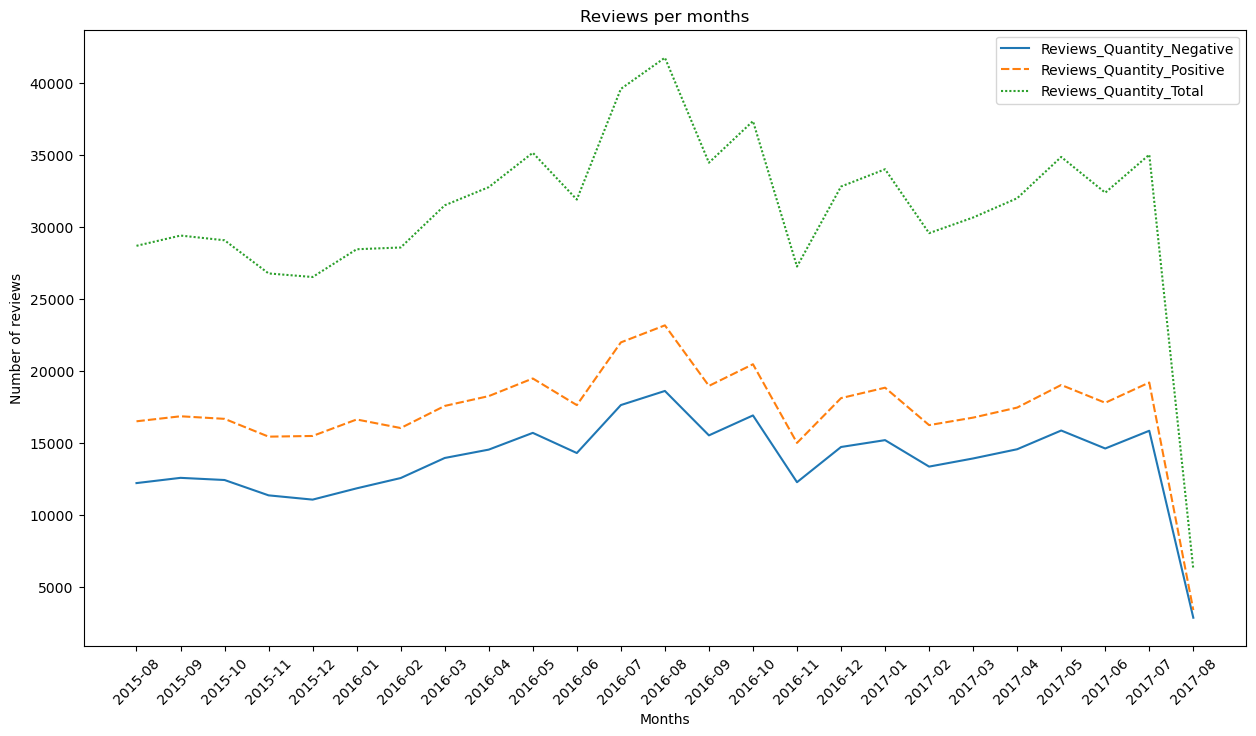

In [271]:
fig, ax = plt.subplots(figsize=(15, 8))
my_plot = sns.lineplot(data=reviews_by_date, ax=ax)              
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
my_plot.set_title('Reviews per months') 
plt.xlabel("Months")
plt.ylabel("Number of reviews")
plt.show()

As expected the lovest amounts of reviews are in November-December, highest in July and August.  

#### Checking the top 10 hotels with the highest amount of negative and positive reviews.
#### В этом куске кода надо переименовать переменные, как минимум на графике. 

In [272]:
hotels_highest_reviews = hotels_reviews_month.loc[:, ["Hotel_Name", "Country", "Reviews_Quantity_Negative", "Reviews_Quantity_Positive", "Reviews_Quantity_Total"]]
hotels_highest_reviews = hotels_highest_reviews.groupby('Hotel_Name').sum()
#hotels_highest_reviews.head(10)

hotels_lowest= hotels_highest_reviews.sort_values(by=["Reviews_Quantity_Negative"], ascending=False)
hotels_highest= hotels_highest_reviews.sort_values(by=["Reviews_Quantity_Positive"], ascending=False)
hotels_all= hotels_highest_reviews.sort_values(by=["Reviews_Quantity_Total"], ascending=False)


C:\Users\jelen\AppData\Local\Temp\ipykernel_21432\3410774890.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75, fontsize=10)


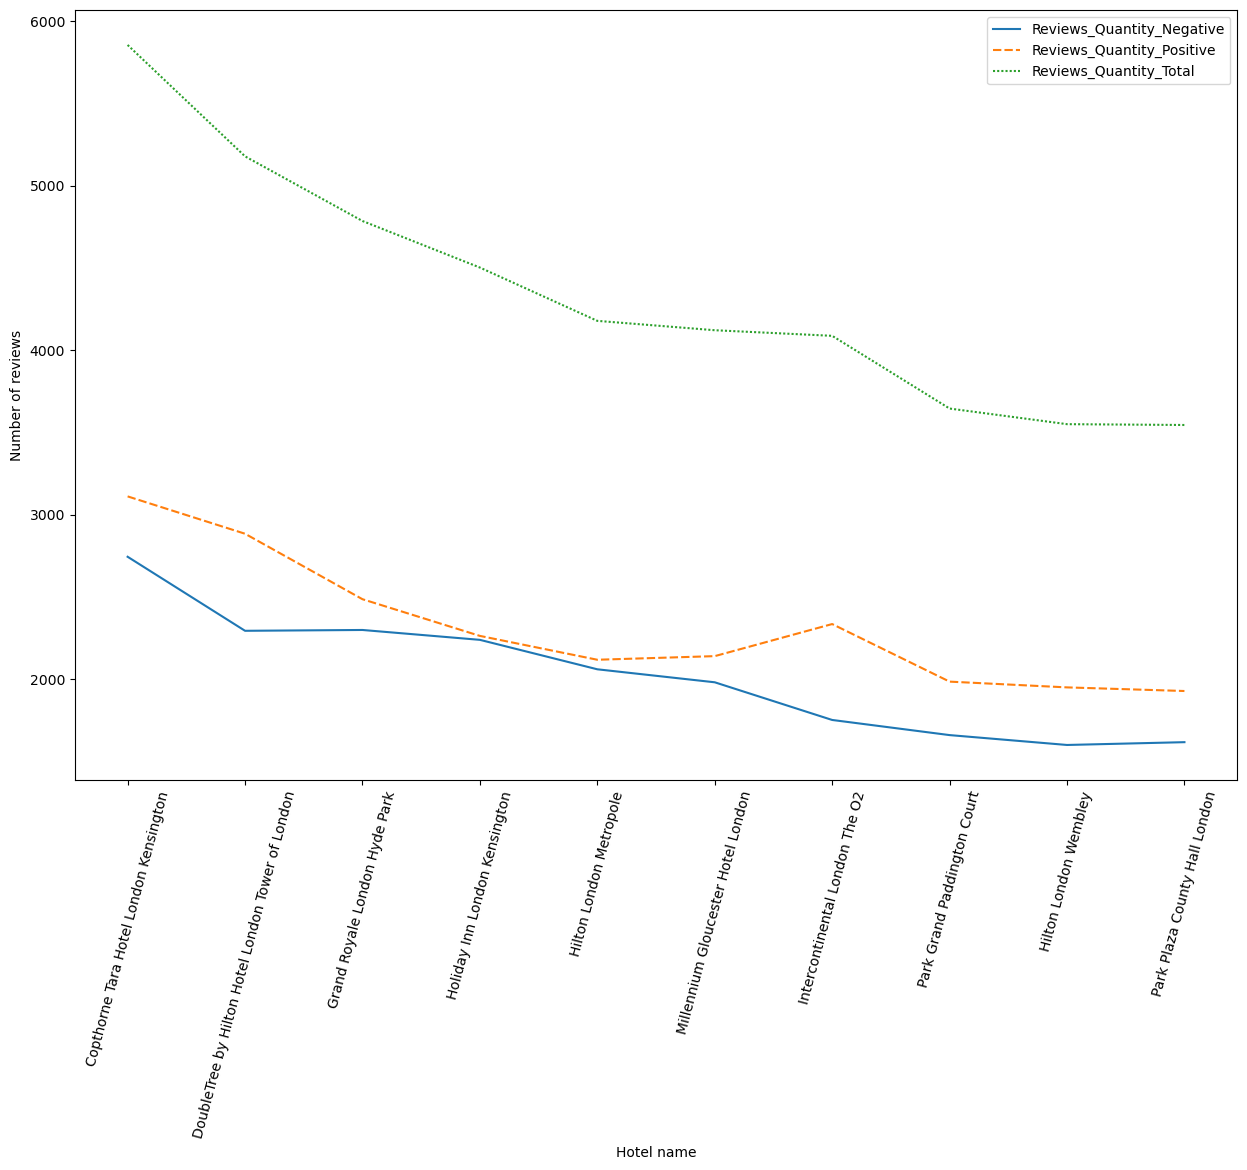

In [273]:
fig, ax = plt.subplots(figsize=(15, 10))
my_plot = sns.lineplot(data=hotels_all.head(10), ax=ax)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75, fontsize=10)
plt.xlabel("Hotel name")
plt.ylabel("Number of reviews")
plt.show()

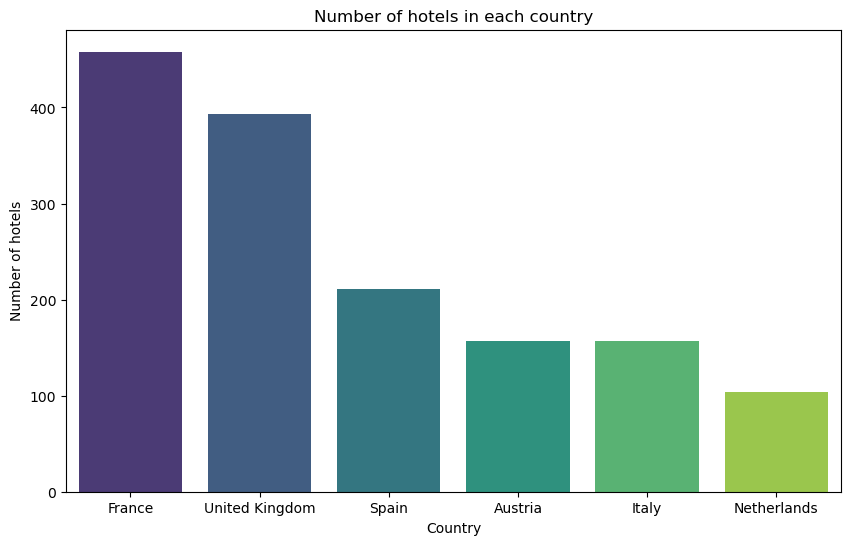

In [274]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hotels_in_country.index, y=hotels_in_country.values, palette='viridis')
plt.title('Number of hotels in each country')
plt.xlabel('Country')
plt.ylabel('Number of hotels')
plt.show()

### Depencency of the positive and negative words to the amount of negative and Positive Reviews


In [275]:
hotels_dependency_positive_negative= hotels_cleaned_date.loc[:, ["Hotel_Name", "Country", "Review_Total_Negative_Word_Counts", "Reviews_Quantity_Negative",
                                                   "Review_Total_Positive_Word_Counts", "Reviews_Quantity_Positive"]]


total_neg_words = hotels_dependency_positive_negative["Review_Total_Negative_Word_Counts"].sum(axis=0)
total_neg_rew = hotels_dependency_positive_negative["Reviews_Quantity_Negative"].sum(axis=0)
total_pos_words = hotels_dependency_positive_negative["Review_Total_Positive_Word_Counts"].sum(axis=0)
total_pos_rew = hotels_dependency_positive_negative["Reviews_Quantity_Positive"].sum(axis=0) 
#print(total_neg_words, total_neg_rew, total_pos_words, total_pos_rew)

hotels_dependency_positive_negative.describe()

,Review_Total_Negative_Word_Counts,Reviews_Quantity_Negative,Review_Total_Positive_Word_Counts,Reviews_Quantity_Positive
count,463330.000000,463330.000000,463330.000000,463330.000000
mean,15.169070,0.742048,15.814040,0.933050
std,19.076669,0.437508,14.982288,0.249936
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,1.000000
50%,8.000000,1.000000,11.000000,1.000000
75%,21.000000,1.000000,21.000000,1.000000
max,107.000000,1.000000,81.000000,1.000000


Maximum amount of negative words per review 107, mean = 15,2. Maximum amount of positive words - 88, mean - 15.8.  

### Этот кусок кандидат на удаление! Visualisation of amount of positive and negative words in relation to the amount of positive and negative reviews

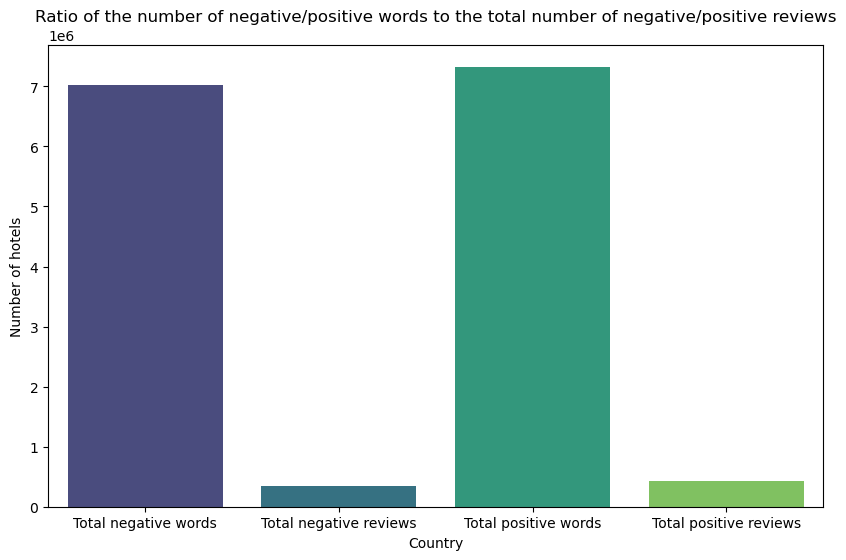

In [276]:
X = ["Total negative words", "Total negative reviews", "Total positive words", "Total positive reviews"]
Y = [total_neg_words, total_neg_rew, total_pos_words, total_pos_rew]
plt.figure(figsize=(10, 6))
sns.barplot(x=X, y=Y, palette='viridis')
plt.title('Ratio of the number of negative/positive words to the total number of negative/positive reviews')
plt.xlabel('Country')
plt.ylabel('Number of hotels')
plt.show()

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Checking the number of unique nationatilities

In [277]:
unique_nationalities = hotels_cleaned_date['Reviewer_Nationality'].unique()
print(unique_nationalities)
number_unique_nationalities= hotels_cleaned_date['Reviewer_Nationality'].nunique()
print(number_unique_nationalities)

[' Australia ' ' Poland ' ' United Kingdom ' ' Belgium ' ' Norway '
 ' France ' ' Italy ' ' Canada ' ' Ireland ' ' Netherlands '
 ' United States of America ' ' Hungary ' ' Israel ' ' Germany ' ' India '
 ' United Arab Emirates ' ' Denmark ' ' South Africa ' ' Switzerland '
 ' Rwanda ' ' Portugal ' ' Luxembourg ' ' Spain ' ' Finland ' ' Malta '
 ' Russia ' ' Turkey ' ' Ukraine ' ' Malaysia ' ' Gibraltar '
 ' Abkhazia Georgia ' ' Isle of Man ' ' Sweden ' ' Croatia '
 ' New Zealand ' ' Lithuania ' ' Slovenia ' ' Panama ' ' Austria '
 ' Brazil ' ' Taiwan ' ' Iceland ' ' Iran ' ' Saudi Arabia '
 ' Liechtenstein ' ' Chile ' ' Hong Kong '
 ' United States Minor Outlying Islands ' ' Morocco ' ' China ' ' Oman '
 ' Qatar ' ' Nigeria ' ' Romania ' ' Czech Republic ' ' Greece '
 ' Thailand ' ' Singapore ' ' Guernsey ' ' Lebanon ' ' Latvia '
 ' Namibia ' ' Japan ' ' Egypt ' ' South Korea ' ' Kuwait ' ' Bahrain '
 ' Jersey ' ' Jordan ' ' Bulgaria ' ' Cyprus ' ' Argentina ' ' Albania '
 ' Estonia '

In [278]:
nationalities = hotels_cleaned_date["Reviewer_Nationality"].value_counts().head(10)

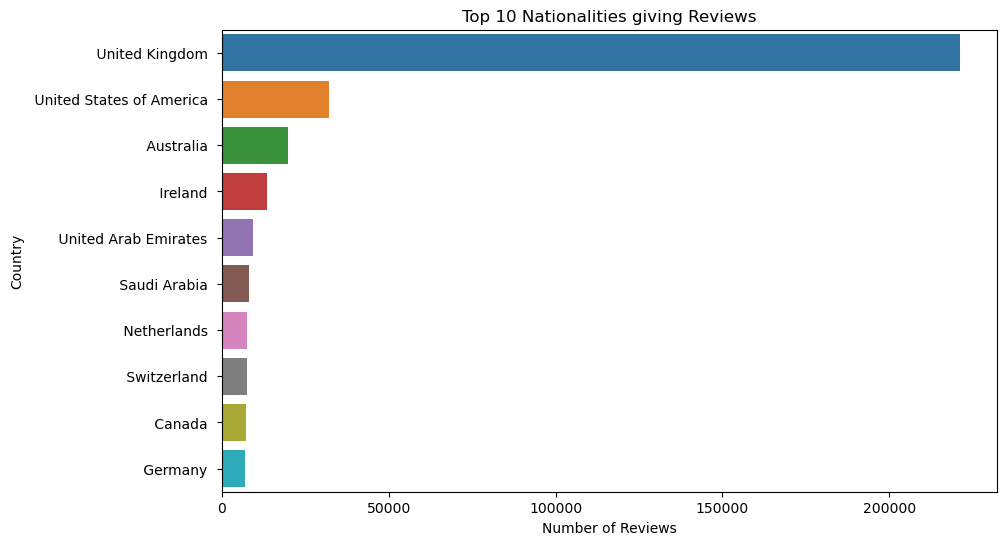

In [279]:
plt.figure(figsize=(10, 6))
sns.barplot(x=nationalities.values, y=nationalities.index)
plt.title('Top 10 Nationalities giving Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()




_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Creating separate dataset which includes only reviews for further sentimental analysis via Streamlite app. 

In [280]:
hotels_reviews= hotels.loc[:, ["Hotel_Name", "Negative_Review", "Positive_Review" ]]
hotels_reviews.shape
hotels_reviews.head()
hotels_reviews_positive = hotels.loc[:, ["Hotel_Name", "Positive_Review" ]]
hotels_reviews_positive["Reviews"] = hotels_reviews_positive["Positive_Review"]
hotels_reviews_positive = hotels_reviews_positive.drop('Positive_Review', axis=1)
hotels_reviews_positive.columns


Index(['Hotel_Name', 'Reviews'], dtype='object')

In [281]:
hotels_reviews.head()
hotels_reviews_negative = hotels.loc[:, ["Hotel_Name", "Negative_Review" ]]
hotels_reviews_negative["Reviews"] = hotels_reviews_negative["Negative_Review"]
hotels_reviews_negative = hotels_reviews_negative.drop('Negative_Review', axis=1)
hotels_reviews_negative.columns


Index(['Hotel_Name', 'Reviews'], dtype='object')

In [282]:
hotels_reviews =  pd.concat([hotels_reviews_positive, hotels_reviews_negative])
hotels_reviews.columns
hotels_reviews.shape
hotels_reviews.to_csv('hotels_reviews.csv')

### Sentimental analysis for customers reviews (1 review example)

In [283]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import transformers
import itertools
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [284]:
reviews = pd.read_csv('hotels_reviews.csv')
reviews.head(10)

,Unnamed: 0,Hotel_Name,Reviews
0,0,Hotel Arena,Only the park outside of the hotel was beauti...
1,1,Hotel Arena,No real complaints the hotel was great great ...
2,2,Hotel Arena,Location was good and staff were ok It is cut...
3,3,Hotel Arena,Great location in nice surroundings the bar a...
4,4,Hotel Arena,Amazing location and building Romantic setting
5,5,Hotel Arena,Good restaurant with modern design great chil...
6,6,Hotel Arena,The room is spacious and bright The hotel is ...
7,7,Hotel Arena,Good location Set in a lovely park friendly s...
8,8,Hotel Arena,No Positive
9,9,Hotel Arena,The room was big enough and the bed is good T...


### Read only 1 review

In [285]:
text = reviews.iloc[0]["Reviews"]
print(text)

 Only the park outside of the hotel was beautiful 


### Replace symbols in text with white space

In [286]:
for c in ['.',',',':',';']:
    text = text.replace(c,'')
print(text)



 Only the park outside of the hotel was beautiful 


### Splitting text into separate words

In [287]:
tokens = text.split()
tokens=[token.lower() for token in tokens if token.isalpha()] #is alphabet
print(tokens)

['only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful']


In [288]:
# downloading sets of negative and positive words
pos = open('positive-words.txt','r').read().split()
neg = open('negative-words.txt','r').read().split()

In [289]:
# downloading set of stop words
stop_words = stopwords.words('english')
print(stop_words[0:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [290]:
# Filtering out stop words. Removing them from the words list.

ctokens = tokens.copy()
for token in tokens:
    if token in stop_words:
        ctokens.remove(token)
print(ctokens[0:20])

['park', 'outside', 'hotel', 'beautiful']


In [292]:
countpositive = countnegative = countneutral = counttotal = 0

token_cat_result={}
for token in ctokens:
    counttotal = counttotal + 1
    cat = ""
    if token in pos:
        cat = cat + "POS"
        countpositive = countpositive + 1
    elif token in neg:
        cat = cat + "NEG"
        countnegative = countnegative + 1
    else:
        countneutral = countneutral + 1
    
    token_cat_result[token]= cat

print("Count POS:", countpositive)
print("Count NEG:", countnegative)
print("Count NEUT:", countneutral)
print("Count total:", counttotal)

Count POS: 1
Count NEG: 0
Count NEUT: 3
Count total: 4


In [294]:
print("Positive=%.2f Negative=%.2f Neutral=%.2f" % (countpositive/counttotal, countnegative/counttotal, countneutral/counttotal))

Positive=0.25 Negative=0.00 Neutral=0.75


In [296]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ctokens
sent_dict = sentiment_pipeline(data)

count_pos=0
count_neg=0
sum_pos=0
sum_neg=0

for i in range(0, len(sent_dict)):
    if sent_dict[i]['label']=='POSITIVE':
        count_pos=count_pos+1
        sum_pos=sum_pos+sent_dict[i]['score']
    elif sent_dict[i]['label']=='NEGATIVE':
        count_neg=count_neg+1
        sum_neg=sum_neg+sent_dict[i]['score']

print("Positive labels:", count_pos, "Score:", sum_pos, "Average positive:", (sum_pos/count_pos))
if count_neg!=0: 
    print("Negative labels:", count_neg, "Score:", sum_neg, "Average positive:", (sum_neg/count_neg))
    
print ("positive:", (count_pos/(count_pos+count_neg)))
print ("negavite:", (count_neg/(count_pos+count_neg)))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Positive labels: 4 Score: 3.9084052443504333 Average positive: 0.9771013110876083
positive: 1.0
negavite: 0.0
